# WeatherPy
----

### Observable Trends
####  Based on the City Latitude vs Max Temperature scatter plot and Global Temperature plot, you can see that:
* Within the tropic region (Between 23.5 N and 23.5 S which), the temperatures does range around the (60-100 Degree F) being significantly warmer. These are the areas closer to the equator and are expected to be warmer. 
* The southern hemispehere temps seems to warmer than the northern hemisphere due to the southern hemisphere tilted towards the sun during this time of the year.

#### Based on the City Latitude vs. Humidity scatter plot and Global Temperature by Humidity, you can see that: 
* There does not seem to be a direct trend on Humidity vs latitude. It seems Humidity % is higher around N and S of latitude overall. Usually, higher humidity causes the weather to be more warmer than what it feels like when we have warm air around and vice versa for cold air. 

* From the Global temperature plot, you can see that there may be some other factor like Elevation that needs to be taken into consideration to understand why Humidity % in certain cities closer to equator is lesser.  

#### On Cloudiness:
* Based on the scatter plot, you can see that there seems to be no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 20, 80, and around 90% cloudiness. Usually warmer weather is ecpected on a clear day (less cloudy) and cooler weather is expected on a Cloudy Day (more cloudy).

* On the Global Tempeature plot by Cloudiness, you can see the Cloudiness seems to be less closer to the equator (bubble size relatively smaller) compared to the ones farther way from the equator (bubble size relatively bigger)

#### On Wind Speed:
* Based on the scatter plot, there seems to be no strong relationshiop between latitude and Wind Speed. However, you can see that there ia flurry of cities in the norhtern hemisphere awith over 20 mph of wind. There needs to be more data points taken for he southern hemisphere to see if the trend continues on that side too. 

* The elevation level needs to be taken into consdieration to see if this affects temperature and wind speed across different latitudes. 


In [1]:
# Updated the Weather Map API keys to unique keys and also ensure to store images with relevant names based on plot
# Ensure to install citipi as needed 
# By: Aruna Amaresan
# Last Updated: Feb 19th 2018 

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate City List using citipy library

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [5]:
# Build data frame of randomly generated lat and long
loc_data = pd.DataFrame()
loc_data['rand_lat'] = [np.random.uniform(-90,90) for x in range(1500)]
loc_data['rand_lng'] = [np.random.uniform(-180, 180) for x in range(1500)]

# Add city and country column
loc_data['city'] = ""
loc_data['country'] = ""

# Find and Add the closest city and country code
for index, row in loc_data.iterrows():
    lat = row['rand_lat']
    lng = row['rand_lng']
    city = citipy.nearest_city(lat, lng)
    print("Index %d: City name: %s Country Code: %s" %(index, city.city_name, city.country_code))
    loc_data.set_value(index, 'city', city.city_name)
    loc_data.set_value(index, 'country', city.country_code)



Index 0: City name: bambous virieux Country Code: mu
Index 1: City name: bluff Country Code: nz
Index 2: City name: tabialan Country Code: ph
Index 3: City name: katherine Country Code: au
Index 4: City name: presidencia roque saenz pena Country Code: ar
Index 5: City name: bengkulu Country Code: id
Index 6: City name: albany Country Code: au
Index 7: City name: barentsburg Country Code: sj
Index 8: City name: airai Country Code: pw
Index 9: City name: ichhawar Country Code: in
Index 10: City name: longyearbyen Country Code: sj
Index 11: City name: rikitea Country Code: pf
Index 12: City name: beringovskiy Country Code: ru
Index 13: City name: ixtapa Country Code: mx
Index 14: City name: killybegs Country Code: ie
Index 15: City name: esperance Country Code: au
Index 16: City name: sobolevo Country Code: ru
Index 17: City name: isangel Country Code: vu
Index 18: City name: yumbing Country Code: ph
Index 19: City name: barentsburg Country Code: sj
Index 20: City name: rikitea Country Co

Index 501: City name: primero de enero Country Code: cu
Index 502: City name: khatanga Country Code: ru
Index 503: City name: punta arenas Country Code: cl
Index 504: City name: vaini Country Code: to
Index 505: City name: port alfred Country Code: za
Index 506: City name: asau Country Code: tv
Index 507: City name: mogadishu Country Code: so
Index 508: City name: ushuaia Country Code: ar
Index 509: City name: chuy Country Code: uy
Index 510: City name: punta arenas Country Code: cl
Index 511: City name: itarema Country Code: br
Index 512: City name: guerrero negro Country Code: mx
Index 513: City name: puerto leguizamo Country Code: co
Index 514: City name: mataura Country Code: pf
Index 515: City name: black river Country Code: jm
Index 516: City name: jonkoping Country Code: se
Index 517: City name: ewa beach Country Code: us
Index 518: City name: atuona Country Code: pf
Index 519: City name: luderitz Country Code: na
Index 520: City name: evensk Country Code: ru
Index 521: City nam

Index 1428: City name: ribeira grande Country Code: pt
Index 1429: City name: ushuaia Country Code: ar
Index 1430: City name: albany Country Code: au
Index 1431: City name: punta arenas Country Code: cl
Index 1432: City name: qaanaaq Country Code: gl
Index 1433: City name: mar del plata Country Code: ar
Index 1434: City name: dikson Country Code: ru
Index 1435: City name: mandalgovi Country Code: mn
Index 1436: City name: port elizabeth Country Code: za
Index 1437: City name: vaini Country Code: to
Index 1438: City name: ushuaia Country Code: ar
Index 1439: City name: hasaki Country Code: jp
Index 1440: City name: bluff Country Code: nz
Index 1441: City name: albany Country Code: au
Index 1442: City name: castro Country Code: cl
Index 1443: City name: ushuaia Country Code: ar
Index 1444: City name: narsaq Country Code: gl
Index 1445: City name: prescott Country Code: us
Index 1446: City name: vikulovo Country Code: ru
Index 1447: City name: coquimbo Country Code: cl
Index 1448: City na

In [6]:
# Delete repeated cities and find unique city count
loc_data = loc_data.drop_duplicates(['city', 'country'])
loc_data = loc_data.dropna()
len(loc_data['city'].value_counts())

603

In [8]:
# Check to see list of all cities - difference may be due to same city name in different country 
rec_check = len(loc_data['city'])  
print(rec_check)

loc_data.head()

604


,rand_lat,rand_lng,city,country
0,-25.314903,63.815343,bambous virieux,mu
1,-77.697752,161.774805,bluff,nz
2,5.313399,122.879035,tabialan,ph
3,-18.693405,132.724402,katherine,au
4,-25.219286,-61.530829,presidencia roque saenz pena,ar


## Perform API Calls 

In [11]:
# Do the actual WeatherMap API call for each city with country code
api_key = "35f9addc033a3eddcd538e1df0680fd0"

# List of city data
city_data = []

# Print to logger
print("Start Data Retrieval        ")
print("----------------------------")

for index, row in loc_data.iterrows():
    lat = row['rand_lat']
    lng = row['rand_lng']
    city = row['city']
    country = row['country']
    
    url = 'https://api.openweathermap.org/data/2.5/weather?q=%s,%s&APPID=%s&units=imperial' % (city, country, api_key)
    #city_url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=%s&q=%s' % (api_key, city) 
    
    # Log the url, record, and set numbers
    print("Processing Record %s | City: %s Country Code: %s" % (index+1, city, country))
    print(url)
    
     # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Done          ")
print("-----------------------------")
        
        


Start Data Retrieval        
----------------------------
Processing Record 1 | City: bambous virieux Country Code: mu
https://api.openweathermap.org/data/2.5/weather?q=bambous virieux,mu&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 2 | City: bluff Country Code: nz
https://api.openweathermap.org/data/2.5/weather?q=bluff,nz&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 3 | City: tabialan Country Code: ph
https://api.openweathermap.org/data/2.5/weather?q=tabialan,ph&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
City not found. Skipping...
Processing Record 4 | City: katherine Country Code: au
https://api.openweathermap.org/data/2.5/weather?q=katherine,au&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 5 | City: presidencia roque saenz pena Country Code: ar
https://api.openweathermap.org/data/2.5/weather?q=presidencia roque saenz pena,ar&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Rec

City not found. Skipping...
Processing Record 54 | City: dikson Country Code: ru
https://api.openweathermap.org/data/2.5/weather?q=dikson,ru&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 55 | City: kutum Country Code: sd
https://api.openweathermap.org/data/2.5/weather?q=kutum,sd&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 56 | City: geraldton Country Code: au
https://api.openweathermap.org/data/2.5/weather?q=geraldton,au&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 58 | City: amderma Country Code: ru
https://api.openweathermap.org/data/2.5/weather?q=amderma,ru&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
City not found. Skipping...
Processing Record 60 | City: saint george Country Code: bm
https://api.openweathermap.org/data/2.5/weather?q=saint george,bm&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 61 | City: nsanje Country Code: mw
https://api.openweathermap.org/data/2.

Processing Record 115 | City: santa maria Country Code: cv
https://api.openweathermap.org/data/2.5/weather?q=santa maria,cv&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 118 | City: port alfred Country Code: za
https://api.openweathermap.org/data/2.5/weather?q=port alfred,za&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 119 | City: clyde river Country Code: ca
https://api.openweathermap.org/data/2.5/weather?q=clyde river,ca&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 121 | City: liverpool Country Code: ca
https://api.openweathermap.org/data/2.5/weather?q=liverpool,ca&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 123 | City: shimoda Country Code: jp
https://api.openweathermap.org/data/2.5/weather?q=shimoda,jp&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 125 | City: wau Country Code: pg
https://api.openweathermap.org/data/2.5/weather?q=wau,pg&APPID=35f9addc

Processing Record 203 | City: asau Country Code: tv
https://api.openweathermap.org/data/2.5/weather?q=asau,tv&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
City not found. Skipping...
Processing Record 204 | City: ronne Country Code: dk
https://api.openweathermap.org/data/2.5/weather?q=ronne,dk&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 205 | City: pomabamba Country Code: pe
https://api.openweathermap.org/data/2.5/weather?q=pomabamba,pe&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 206 | City: kitami Country Code: jp
https://api.openweathermap.org/data/2.5/weather?q=kitami,jp&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 208 | City: vao Country Code: nc
https://api.openweathermap.org/data/2.5/weather?q=vao,nc&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 209 | City: upernavik Country Code: gl
https://api.openweathermap.org/data/2.5/weather?q=upernavik,gl&APPID=35f9addc033a

Processing Record 288 | City: phan rang Country Code: vn
https://api.openweathermap.org/data/2.5/weather?q=phan rang,vn&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
City not found. Skipping...
Processing Record 290 | City: aripuana Country Code: br
https://api.openweathermap.org/data/2.5/weather?q=aripuana,br&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 291 | City: kahului Country Code: us
https://api.openweathermap.org/data/2.5/weather?q=kahului,us&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 292 | City: waipawa Country Code: nz
https://api.openweathermap.org/data/2.5/weather?q=waipawa,nz&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 295 | City: pevek Country Code: ru
https://api.openweathermap.org/data/2.5/weather?q=pevek,ru&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 298 | City: baykit Country Code: ru
https://api.openweathermap.org/data/2.5/weather?q=baykit,ru&APPID=

City not found. Skipping...
Processing Record 388 | City: mount gambier Country Code: au
https://api.openweathermap.org/data/2.5/weather?q=mount gambier,au&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 390 | City: labuhan Country Code: id
https://api.openweathermap.org/data/2.5/weather?q=labuhan,id&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 391 | City: wukari Country Code: ng
https://api.openweathermap.org/data/2.5/weather?q=wukari,ng&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 392 | City: harper Country Code: lr
https://api.openweathermap.org/data/2.5/weather?q=harper,lr&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 393 | City: el mahalla el kubra Country Code: eg
https://api.openweathermap.org/data/2.5/weather?q=el mahalla el kubra,eg&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
City not found. Skipping...
Processing Record 395 | City: hay river Country Code: ca
https

Processing Record 502 | City: primero de enero Country Code: cu
https://api.openweathermap.org/data/2.5/weather?q=primero de enero,cu&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 508 | City: mogadishu Country Code: so
https://api.openweathermap.org/data/2.5/weather?q=mogadishu,so&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 512 | City: itarema Country Code: br
https://api.openweathermap.org/data/2.5/weather?q=itarema,br&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 513 | City: guerrero negro Country Code: mx
https://api.openweathermap.org/data/2.5/weather?q=guerrero negro,mx&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 514 | City: puerto leguizamo Country Code: co
https://api.openweathermap.org/data/2.5/weather?q=puerto leguizamo,co&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 516 | City: black river Country Code: jm
https://api.openweathermap.org/data/2

Processing Record 653 | City: codrington Country Code: ag
https://api.openweathermap.org/data/2.5/weather?q=codrington,ag&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
City not found. Skipping...
Processing Record 657 | City: pilar Country Code: ph
https://api.openweathermap.org/data/2.5/weather?q=pilar,ph&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 658 | City: quelimane Country Code: mz
https://api.openweathermap.org/data/2.5/weather?q=quelimane,mz&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 666 | City: hasaki Country Code: jp
https://api.openweathermap.org/data/2.5/weather?q=hasaki,jp&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 667 | City: ponta delgada Country Code: pt
https://api.openweathermap.org/data/2.5/weather?q=ponta delgada,pt&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 668 | City: meulaboh Country Code: id
https://api.openweathermap.org/data/2.5/weather?q=

Processing Record 766 | City: lorengau Country Code: pg
https://api.openweathermap.org/data/2.5/weather?q=lorengau,pg&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 767 | City: hirara Country Code: jp
https://api.openweathermap.org/data/2.5/weather?q=hirara,jp&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 768 | City: bobo dioulasso Country Code: bf
https://api.openweathermap.org/data/2.5/weather?q=bobo dioulasso,bf&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
City not found. Skipping...
Processing Record 769 | City: nurota Country Code: uz
https://api.openweathermap.org/data/2.5/weather?q=nurota,uz&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 770 | City: segamat Country Code: my
https://api.openweathermap.org/data/2.5/weather?q=segamat,my&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 772 | City: fevralsk Country Code: ru
https://api.openweathermap.org/data/2.5/weather?q=fevr

Processing Record 919 | City: bushtyno Country Code: ua
https://api.openweathermap.org/data/2.5/weather?q=bushtyno,ua&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 924 | City: windsor Country Code: us
https://api.openweathermap.org/data/2.5/weather?q=windsor,us&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 925 | City: sinkat Country Code: sd
https://api.openweathermap.org/data/2.5/weather?q=sinkat,sd&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
City not found. Skipping...
Processing Record 931 | City: dakar Country Code: sn
https://api.openweathermap.org/data/2.5/weather?q=dakar,sn&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 932 | City: luba Country Code: gq
https://api.openweathermap.org/data/2.5/weather?q=luba,gq&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 933 | City: el llano Country Code: mx
https://api.openweathermap.org/data/2.5/weather?q=el llano,mx&APPID=35f9addc

Processing Record 1060 | City: kasempa Country Code: zm
https://api.openweathermap.org/data/2.5/weather?q=kasempa,zm&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 1061 | City: fengrun Country Code: cn
https://api.openweathermap.org/data/2.5/weather?q=fengrun,cn&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 1064 | City: mandalgovi Country Code: mn
https://api.openweathermap.org/data/2.5/weather?q=mandalgovi,mn&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 1068 | City: sawakin Country Code: sd
https://api.openweathermap.org/data/2.5/weather?q=sawakin,sd&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 1077 | City: cardston Country Code: ca
https://api.openweathermap.org/data/2.5/weather?q=cardston,ca&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 1078 | City: varsag Country Code: ro
https://api.openweathermap.org/data/2.5/weather?q=varsag,ro&APPID=35f9addc033a3edd

City not found. Skipping...
Processing Record 1210 | City: bandar-e torkaman Country Code: ir
https://api.openweathermap.org/data/2.5/weather?q=bandar-e torkaman,ir&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
City not found. Skipping...
Processing Record 1214 | City: tautira Country Code: pf
https://api.openweathermap.org/data/2.5/weather?q=tautira,pf&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 1215 | City: kaeo Country Code: nz
https://api.openweathermap.org/data/2.5/weather?q=kaeo,nz&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 1222 | City: ialibu Country Code: pg
https://api.openweathermap.org/data/2.5/weather?q=ialibu,pg&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 1230 | City: halalo Country Code: wf
https://api.openweathermap.org/data/2.5/weather?q=halalo,wf&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
City not found. Skipping...
Processing Record 1231 | City: lokosovo Country Cod

City not found. Skipping...
Processing Record 1346 | City: bima Country Code: id
https://api.openweathermap.org/data/2.5/weather?q=bima,id&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 1347 | City: tuatapere Country Code: nz
https://api.openweathermap.org/data/2.5/weather?q=tuatapere,nz&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 1353 | City: coolum beach Country Code: au
https://api.openweathermap.org/data/2.5/weather?q=coolum beach,au&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 1361 | City: rawson Country Code: ar
https://api.openweathermap.org/data/2.5/weather?q=rawson,ar&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 1367 | City: jutai Country Code: br
https://api.openweathermap.org/data/2.5/weather?q=jutai,br&APPID=35f9addc033a3eddcd538e1df0680fd0&units=imperial
Processing Record 1369 | City: high prairie Country Code: ca
https://api.openweathermap.org/data/2.5/weather?q=high

In [12]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bambous virieux,90,MU,1519027200,74,-20.34,57.76,86.00,8.05
1,bluff,64,NZ,1519030722,100,-46.60,168.33,57.57,19.64
2,katherine,36,AU,1519029000,59,-14.47,132.26,89.60,8.05
3,presidencia roque saenz pena,24,AR,1519030723,97,-26.79,-60.44,69.27,5.55
4,albany,92,AU,1519030724,85,-35.02,117.88,63.87,18.07


In [13]:

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          532
Cloudiness    532
Country       532
Date          532
Humidity      532
Lat           532
Lng           532
Max Temp      532
Wind Speed    532
dtype: int64

## Latitude vs Temperature Plot

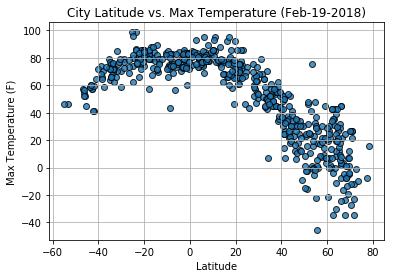

In [16]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%b-%d-%Y"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/1_Lat_vs_MaxTemp.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

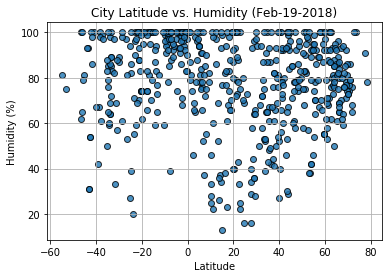

In [18]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%b-%d-%Y"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/2_Lat_vs_Humid.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

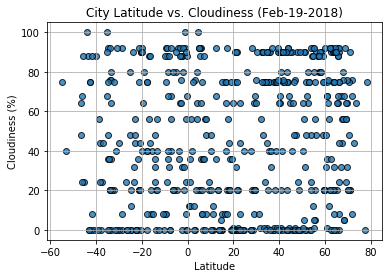

In [19]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%b-%d-%Y"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/3_Lat_vs_Cloud.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

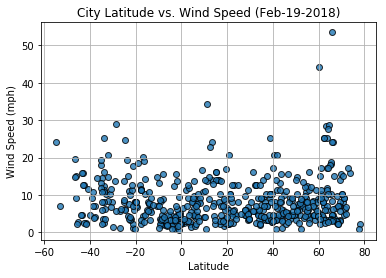

In [20]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%b-%d-%Y"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/4_Lat_vs_WindSp.png")

# Show plot
plt.show()

## Max Temp Across Globe - Bubble Size Indicates Different Factors

In [21]:
size_list = ['Humidity', 'Cloudiness', 'Wind Speed']

for measure in size_list:
    print(measure)

Humidity
Cloudiness
Wind Speed


output_data/Global_Max_TempBy_Humidity.png


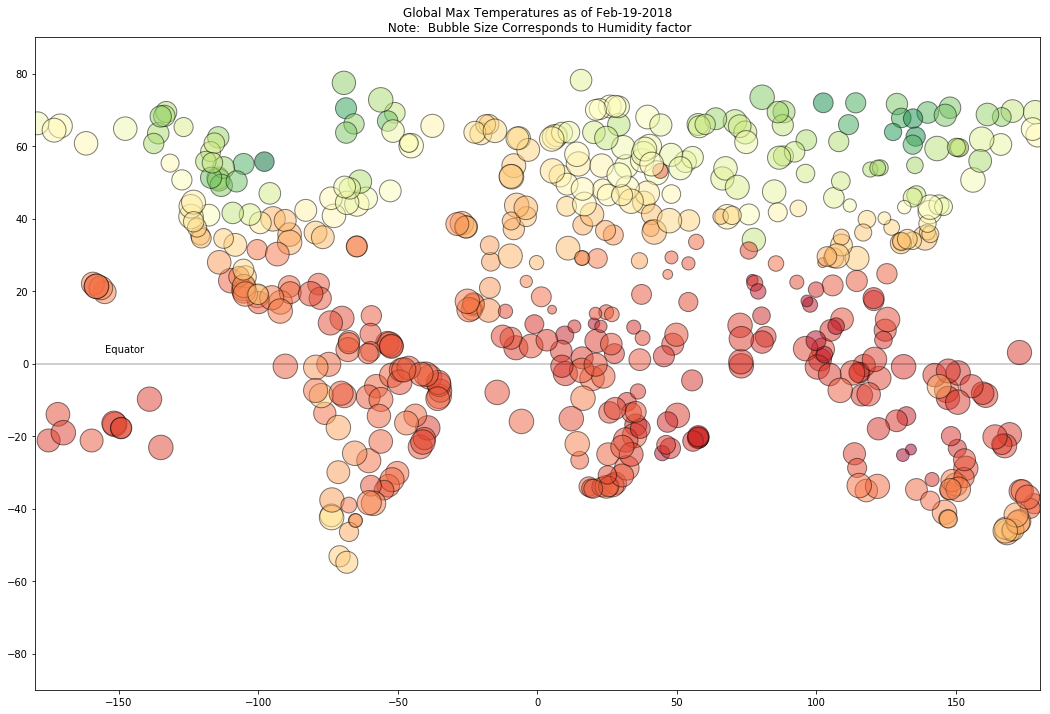

output_data/Global_Max_TempBy_Cloudiness.png


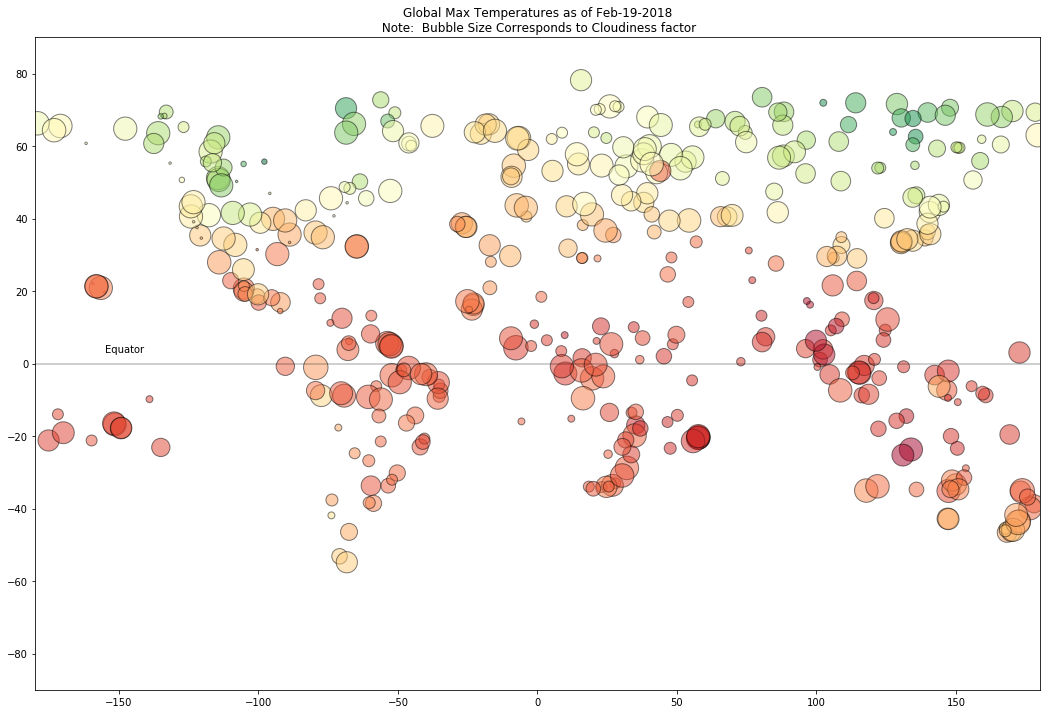

output_data/Global_Max_TempBy_Wind Speed.png


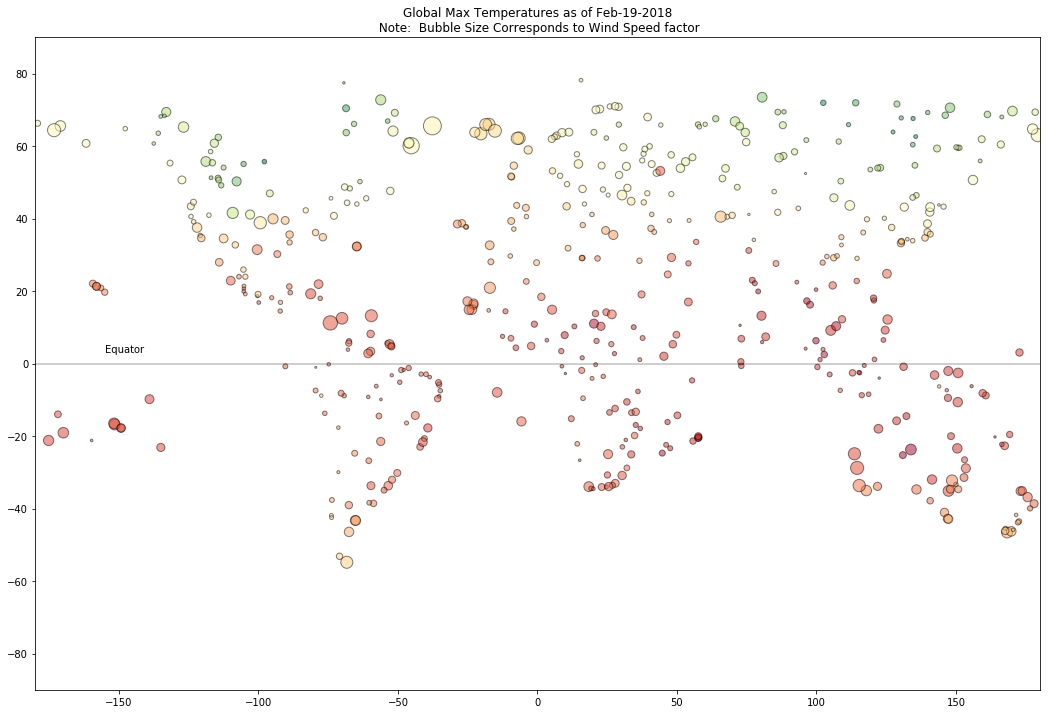

In [25]:
# Try show visual latitude vs longitude, temperature scale from red(hot) to green(cool), and 
# bubble size based on humidity, cloud cover, and wind speed
lats = city_data_pd["Lat"]
lngs = city_data_pd["Lng"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

xvars = lngs
yvars = lats
color = max_temps
size_list = ['Humidity', 'Cloudiness', 'Wind Speed']

#loops through size list and only changes size of bubbles based on different variables
for measure in size_list:  
    plt.figure(figsize = (18,12))
    plt.xlim(-180,180)
    plt.ylim(-90,90)
    plt.title("Global Max Temperatures as of %s\n Note:  Bubble Size Corresponds to %s factor" % (time.strftime("%b-%d-%Y"), measure))
    plt.axhline(0, color = 'black', alpha = .25, label = 'Equator')
    plt.text(-155,3,'Equator')
    size = city_data_pd[measure]
    plt.scatter(xvars, 
                yvars, 
                c = color, 
                s = size * 6, 
                edgecolor = 'black', 
                linewidth = 1, 
                alpha = .5, 
                cmap=plt.cm.RdYlGn_r)
    file_name = "output_data/Global_Max_TempBy_" + measure + ".png"
    print(file_name)
    plt.savefig(file_name)
    plt.show()
